In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


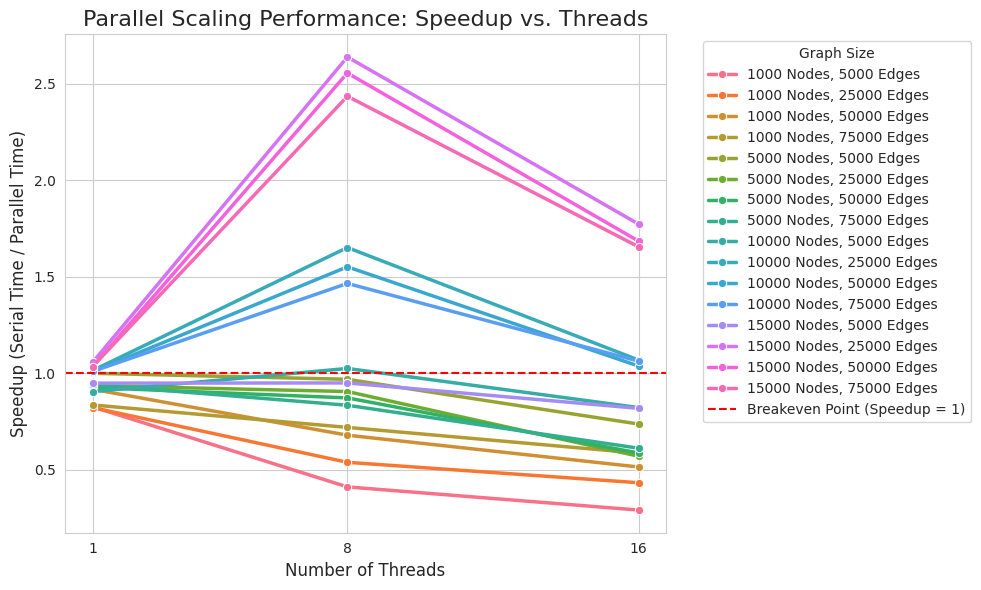

In [2]:
# Read the CSV file
df = pd.read_csv("dijkstra_timings.csv")

# Ensure necessary columns are numeric and create the Problem Size label
df['Threads'] = df['threads'].astype(int)
df['Speedup'] = df['speedup'].astype(float)
df['Nodes'] = df['nodes'].astype(str)
df['Edges'] = df['edges'].astype(str)
df['Problem_Size'] = df['Nodes'] + ' Nodes, ' + df['Edges'] + ' Edges'

# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the multi-line plot using seaborn for easy grouping
# hue=df['Problem_Size'] creates a separate line for each unique problem size
sns.lineplot(data=df, x='Threads', y='Speedup', hue='Problem_Size', marker='o', errorbar=None, linewidth=2.5)

# Add a horizontal line at Speedup = 1.0 (breakeven point)
plt.axhline(1.0, color='r', linestyle='--', linewidth=1.5, label='Breakeven Point (Speedup = 1)')

# Set labels and title
plt.title('Parallel Scaling Performance: Speedup vs. Threads', fontsize=16)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Speedup (Serial Time / Parallel Time)', fontsize=12)

# Ensure X-axis ticks match the thread counts (1, 8, 16)
plt.xticks([1, 8, 16])

# Place the legend outside the plot area for clarity
plt.legend(title='Graph Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save the plot
plt.savefig('parallel_scaling_speedup_plot.png')